# Analysis Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('font', size = 20)
plt.rc('text', usetex=True)
#!conda info

## Configeration

In [2]:
# Numbers
hv = 500         # n of HVs
av = 500         # n of AVs
N = 500           # n of Days

# Human Parameters
hv_err = 5        # error term on HV time perception ~N(0, hv_err)
hv_theta = .5     # rationality
hv_beta = .5      # prob of change route
hv_len = 3        # Memory lenth
hv_atis_bais = 0  # bias*prevTT + (1-bais)*memTT

# AV Parameters
av_err = 0
av_theta = 1
av_len = 1000     
av_atis_bias = 0

path = f"data/sim-ROUTES-N{N}-hv{hv}at{hv_err}_{hv_theta}_{hv_beta}_{hv_len}_{hv_atis_bais}-av{av}at{av_err}_{av_theta}_{av_len}_{av_atis_bias}.pickle"

## Plots

In [3]:
# Def variables
variable = [1, 2, 3, 4, 10, 30, 50, 70, 100, 250]
var_len = range(len(variable))
tables = ["missing" for i in var_len]


In [4]:
# Get data for variables
# SET -> VAR <- = variable[i]
for i in var_len:
    
    hv_len = variable[i]
    path = f"data/sim-ROUTES-N{N}-hv{hv}at{hv_err}_{hv_theta}_{hv_beta}_{hv_len}_{hv_atis_bais}-av{av}at{av_err}_{av_theta}_{av_len}_{av_atis_bias}.pickle"
    print(path)
    
    tables[i] = pickle.load(open(path, "rb" ))

data/sim-ROUTES-N500-hv500at5_0.5_0.5_1_0-av500at0_1_1000_0.pickle
data/sim-ROUTES-N500-hv500at5_0.5_0.5_2_0-av500at0_1_1000_0.pickle
data/sim-ROUTES-N500-hv500at5_0.5_0.5_3_0-av500at0_1_1000_0.pickle
data/sim-ROUTES-N500-hv500at5_0.5_0.5_4_0-av500at0_1_1000_0.pickle
data/sim-ROUTES-N500-hv500at5_0.5_0.5_10_0-av500at0_1_1000_0.pickle
data/sim-ROUTES-N500-hv500at5_0.5_0.5_30_0-av500at0_1_1000_0.pickle
data/sim-ROUTES-N500-hv500at5_0.5_0.5_50_0-av500at0_1_1000_0.pickle
data/sim-ROUTES-N500-hv500at5_0.5_0.5_70_0-av500at0_1_1000_0.pickle
data/sim-ROUTES-N500-hv500at5_0.5_0.5_100_0-av500at0_1_1000_0.pickle
data/sim-ROUTES-N500-hv500at5_0.5_0.5_250_0-av500at0_1_1000_0.pickle


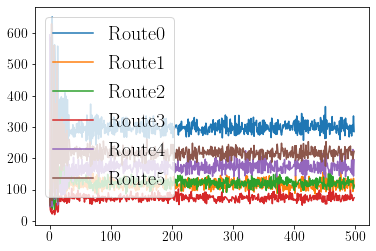

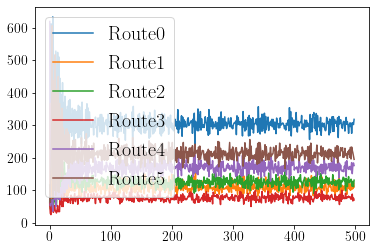

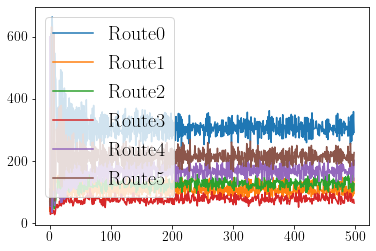

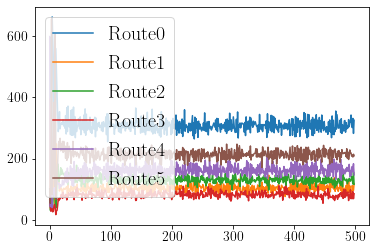

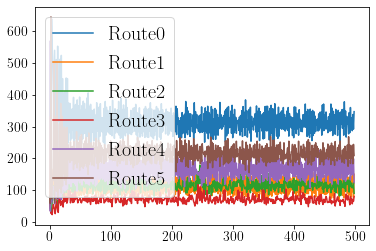

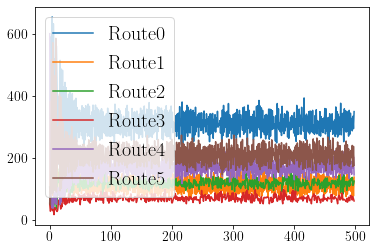

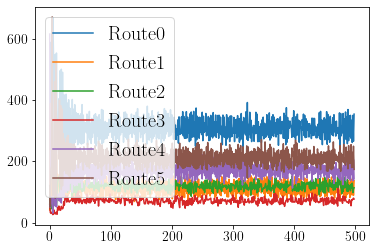

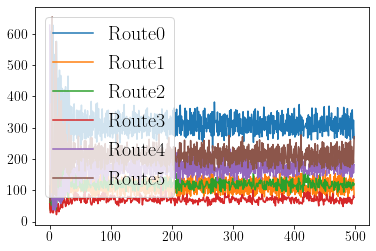

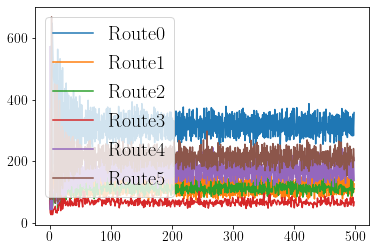

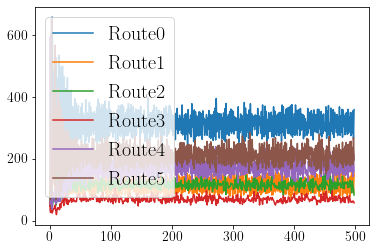

In [5]:
for table in tables:
    table.plot()

[312.24, 113.06, 120.132, 71.52, 173.02, 210.028]


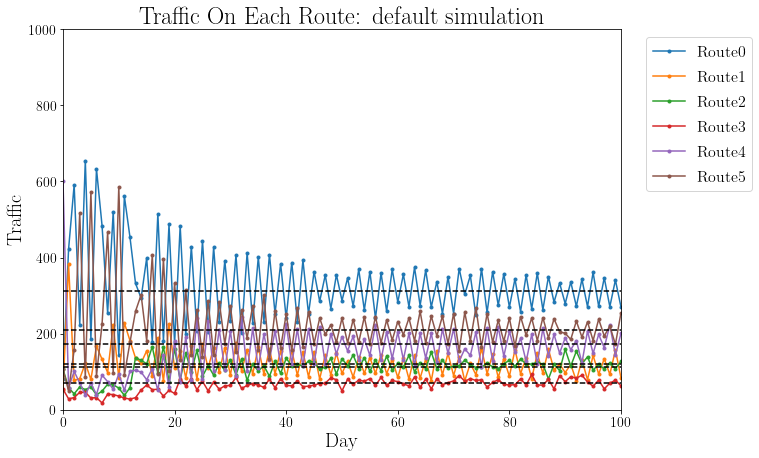

In [6]:
# Table tab
tab = 5
vari = variable[tab]
test = tables[tab]
means = [test[f'Route{i}'].tail(250).mean() for i in range(6) ]


#set up figure
fig, ax = plt.subplots(figsize=(10,7))
ax.set(xlim=[0, 100], ylim=[0,1000], xlabel='Day', ylabel='Traffic',
   title='Traffic On Each Route: default simulation  ')

# Add data
test.plot(ax=ax, style = 'o-' ,markersize=3)
ax.legend(bbox_to_anchor=(1.25, 1), fontsize=16)
for mean in means:
    ax.axhline(mean, ls='--', color='k')   
#ax.grid()
#fig.savefig('figs/default.png', transparent=False, dpi=80, bbox_inches="tight")
print(means)


298.856
307.424
310.04
313.676


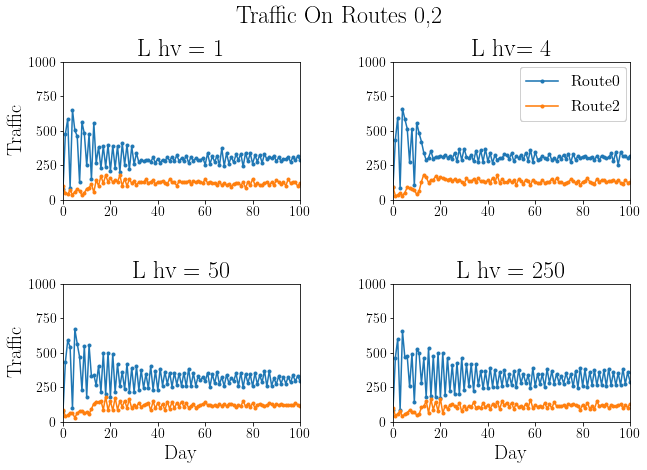

In [24]:
#set up figure
fig, axs = plt.subplots(2,2, figsize=(10,7))
fig.suptitle('Traffic On Routes 0,2')
fig.tight_layout(pad=3.0)
axgen = (ax for ax in axs.flatten())
#variable = [1, 2, 3, 4, 10, 30, 50, 70, 100, 250]

# Add data
for tab in [0,3,6,9]:
    
    ax = next(axgen)
    vari = variable[tab]  #hv
    test = tables[tab]    #av  
    print(mean0 := test['Route0'].tail(250).mean())    
    mean2 = test['Route2'].tail(250).mean()
    
    test['Route0'].plot(ax=ax, style = 'o-' ,markersize=3, legend = False)
    test['Route2'].plot(ax=ax, style = 'o-' ,markersize=3, legend = False)
    #ax.axhline(mean0 , ls='--', color='k')
    #ax.axhline(mean2 , ls='--', color='k')  
    #ax.text(101,mean0,f'-{round(mean0,1)}')
    #ax.text(101,mean2,f'-{round(mean2,1)}')
    
    if ax == axs.flatten()[0]:
        ax.set(xlim=[0, 100], ylim=[0,1000], ylabel='Traffic', title=f'L hv = {vari}' )
    if ax == axs.flatten()[1]:
        ax.set(xlim=[0, 100], ylim=[0,1000], title=f'L hv= {vari}')
    if ax == axs.flatten()[2]:
        ax.set(xlim=[0, 100], ylim=[0,1000],xlabel='Day', ylabel='Traffic', title=f'L hv = {vari}')
    if ax == axs.flatten()[3]:
        ax.set(xlim=[0, 100], ylim=[0,1000],xlabel='Day',  title=f'L hv = {vari}')
    
    fig.legend(['Route0','Route2'], bbox_to_anchor=(.87, .80), fontsize=16, borderaxespad=0.)
    #ax.grid()
    
fig.savefig(f'figs/hv_l_grid.png', transparent=False, dpi=80, bbox_inches="tight")

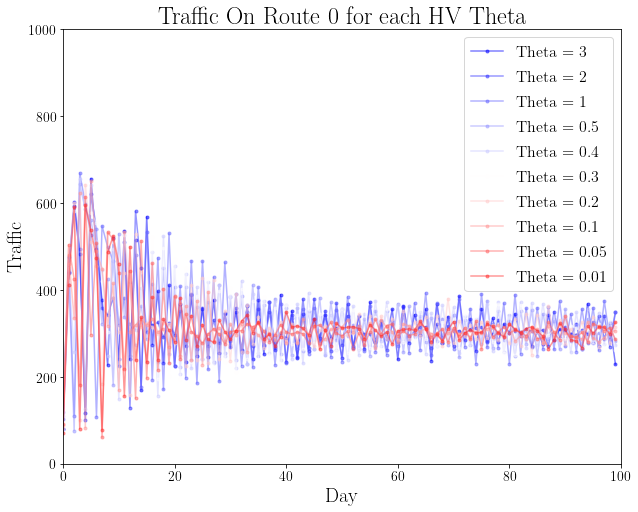

In [68]:
#set up figure
fig, ax = plt.subplots(figsize=(10,8))
ax.set(xlim=[0, 100], ylim=[0,1000], xlabel='Day', ylabel='Traffic',
       title="Traffic On Route 0 for each HV Theta" )
colors = plt.cm.bwr(np.linspace(0,1,11))
colors = (elem for elem in colors)
lables = (f"Theta = {elem}" for elem in reversed(variable))

# Add data
for test in reversed(tables):
    col = next(colors)
    mean = test['Route0'].tail(50).mean()
    std = test['Route0'].tail(50).std()
    test['Route0'].plot(ax=ax, style = "o-" , markersize=3, color = col, alpha = .5, label = next(lables) )
    #ax.axhline(mean  + 2*std , ls='--', color = col)
    #ax.axhline(mean  - 2*std , ls='--', color = col)
ax.legend(bbox_to_anchor=(1, 1), fontsize=16)     

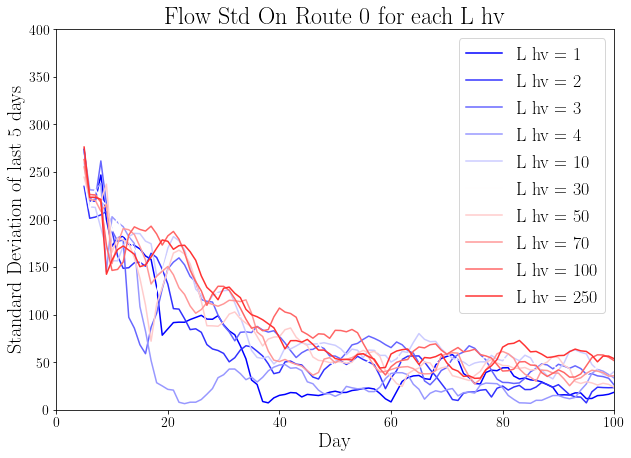

In [25]:
#set up data list
data = [table['Route0'] for table in tables]
labels = ("L hv ="+ f" {elem}" for elem in variable)
depth = 5
y = [i for i in range(depth, 500)]

#set up figure
fig, ax = plt.subplots(figsize=(10,7))
ax.set(xlim=[0, 100], ylim=[0,400], xlabel='Day', ylabel='Standard Deviation of last 5 days',
       title= "Flow Std On Route 0 for each L hv" )
#ax.set_xlabel(xlabel='Day', fontsize=20)
colors = plt.cm.bwr(np.linspace(0,1,11))
colors = (elem for elem in colors)

# Add data
for series in data:
    col = next(colors)
    label = next(labels)
    
    points = []
    for i in range(depth,500):
        point = series[i-depth : i].std()
        points.append(point)
    ax.plot(y, points, markersize=3, color = col, alpha = 1, label = label )
    
ax.legend(bbox_to_anchor=(1, 1), fontsize=18) 
fig.savefig('figs/hv_l_std.png', transparent=False, dpi=200, bbox_inches="tight")

[298.856, 116.448, 121.048, 73.688, 173.688, 216.272]
[303.66, 109.716, 126.164, 77.576, 170.692, 212.192]
[305.96, 108.192, 126.616, 77.46, 168.58, 213.192]
[307.424, 103.98, 130.148, 82.228, 162.82, 213.4]
[313.764, 115.124, 115.58, 70.6, 169.488, 215.444]
[312.24, 113.06, 120.132, 71.52, 173.02, 210.028]
[310.04, 113.364, 119.548, 71.988, 173.6, 211.46]
[309.584, 114.804, 118.96, 70.472, 175.0, 211.18]
[316.452, 118.26, 112.116, 65.708, 173.196, 214.268]
[313.676, 115.864, 115.644, 68.684, 174.2, 211.932]


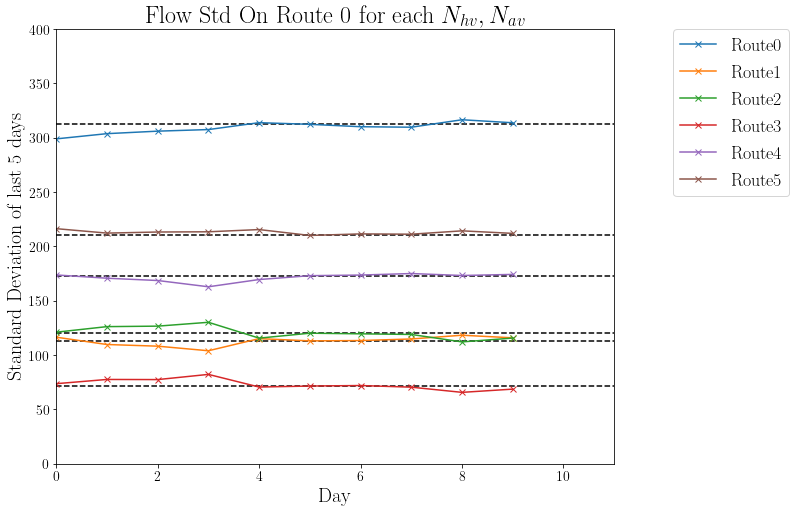

In [11]:
test = tables[5]

all_means = pd.DataFrame(columns = [f'Route{i}' for i in range(6) ])
mmeans = [test[f'Route{i}'].tail(250).mean() for i in range(6) ]

i = 0
for tabb in tables:
    means = [tabb[f'Route{i}'].tail(250).mean() for i in range(6) ]
    all_means.loc[i] = means
    i = i+1
    print(means)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.set(xlim=[0, 11], ylim=[0,400], xlabel='Day', ylabel='Standard Deviation of last 5 days',
        title= "Flow Std On Route 0 for each $N_{hv},N_{av}$" )
for mmean in mmeans:
    ax.axhline(mmean, ls='--', color='k')   
all_means.plot(ax=ax, style = 'x-')
ax.legend(bbox_to_anchor=(1.33, 1.02), fontsize=18) 

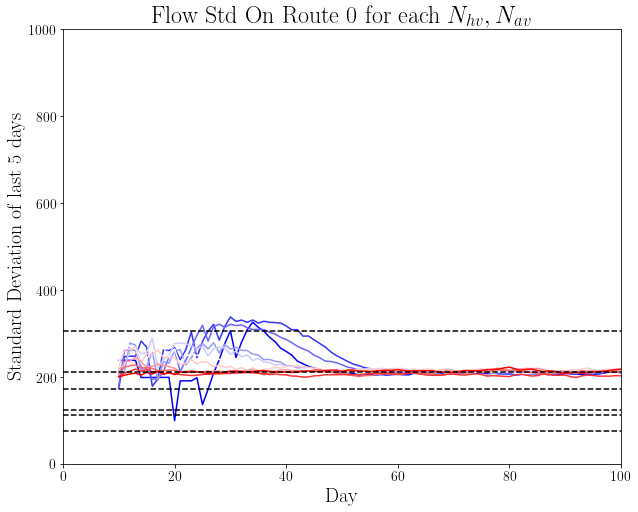

In [11]:
#set up data list
data = [table['Route5'] for table in tables]
means = [test[f'Route{i}'].tail(250).mean() for i in range(6) ]
labels = ("$N_{hv}$ ="+ f" {elem}" for elem in variable)
depth = 10
y = [i for i in range(depth, 500)]

#set up figure
fig, ax = plt.subplots(figsize=(10,8))
ax.set(xlim=[0, 100], ylim=[0,1000], xlabel='Day', ylabel='Standard Deviation of last 5 days',
       title= "Flow Std On Route 0 for each $N_{hv},N_{av}$" )
#ax.set_xlabel(xlabel='Day', fontsize=20)
colors = plt.cm.bwr(np.linspace(0,1,11))
colors = (elem for elem in colors)

# Add data
for series in data:
    col = next(colors)
    label = next(labels)
    
    points = []
    for i in range(depth,500):
        point = series[i-depth : i].mean()
        points.append(point)
    ax.plot(y, points, markersize=3, color = col, alpha = 1, label = label )
for mean in means:
    ax.axhline(mean, ls='--', color='k')   
    
#ax.legend(bbox_to_anchor=(1.33, 1.02), fontsize=18) 
#fig.savefig('figs/hv_av_std.png', transparent=False, dpi=80, bbox_inches="tight")

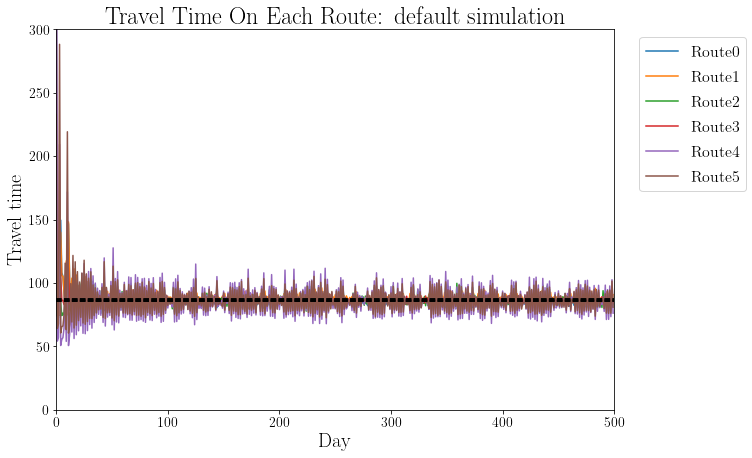

In [51]:
times_dir = f"data/sim-TIMES-N{N}-hv{hv}at{hv_err}_{hv_theta}_{hv_beta}_{hv_len}_{hv_atis_bais}-av{av}at{av_err}_{av_theta}_{av_len}_{av_atis_bias}.pickle"
time_routes = pickle.load(open(times_dir, "rb" ))
time_means = list(time_routes.tail(250).mean())


fig, ax = plt.subplots(figsize=(10,7))
ax.set(xlim=[0, 500], ylim=[0,300], xlabel='Day', ylabel='Travel time',
   title='Travel Time On Each Route: default simulation  ')

# Add data
time_routes.plot(ax=ax)
for m in time_means:
    ax.axhline(m, ls='--', color='k') 

ax.legend(bbox_to_anchor=(1.25, 1), fontsize=16) 

#fig.savefig('figs/default_tts.png', transparent=False, dpi=80, bbox_inches="tight")
#ax.grid()

In [43]:
list(time_routes.tail(250).mean())

NameError: name 'time_routes' is not defined